# NYC Shared CitiBike System Data Analysis

CitiBike is a shared bike project initiated on May 27, 2013 at NYC. Named after its sponsor, Citi Bank, CitiBike initially has more than 8000 bikes and 500 rental stations across Manhattan, Brooklyn, Queens and Jersey City. Now it has more than 14500 bikes in total. It aims to provide NYC residents and visitors with a convenient and thrifty way of transportation. https://www.citibikenyc.com/ 

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://d21xlh2maitm24.cloudfront.net/nyc/RFBS_1200x960.png?mtime=20200319111710")

In [2]:
Image(url= "https://d21xlh2maitm24.cloudfront.net/nyc/station-map-2018-0209.png?mtime=20180209133121")

People can rent CitiBike almost anywhere and return the bike at their destinations. Using the CitiBike is very easy: purchase membersip, search for any available bikes nearby, unlock it using membership key, and return the bike in 30-45 minutes effective usage and re-lock it. Since every CitiBike rental station has GPS coordinates, each rental and riding data can be recorded. Citi Bike official website provided user data, including starting and ending time and location for every single trip by any bike, trip duration, bike ID, and user’s gender and date of birth, etc. https://www.citibikenyc.com/system-data 

I will use Python to conduct a data analysis on CitiBike’s 2019 Data, to understand how the shared bike system works in NYC, and answer questions such as, who are using CitiBike? When are they riding? Trip duration and distance? Any popular routes? Etc. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [2]:
# get time of a Python program's execution
# https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution
import time, datetime
script_run_start_time = time.time()

In [3]:
# Citi Bike Data: https://www.citibikenyc.com/system-data
# Load the Citi Bike Project Data and create DataFrame
cb1 = pd.DataFrame(pd.read_csv('2019 Data/JC-201901-citibike-tripdata.csv'))
cb2 = pd.DataFrame(pd.read_csv('2019 Data/JC-201902-citibike-tripdata.csv'))
cb3 = pd.DataFrame(pd.read_csv('2019 Data/JC-201903-citibike-tripdata.csv'))
cb4 = pd.DataFrame(pd.read_csv('2019 Data/JC-201904-citibike-tripdata.csv'))
cb5 = pd.DataFrame(pd.read_csv('2019 Data/JC-201905-citibike-tripdata.csv'))
cb6 = pd.DataFrame(pd.read_csv('2019 Data/JC-201906-citibike-tripdata.csv'))
cb7 = pd.DataFrame(pd.read_csv('2019 Data/JC-201907-citibike-tripdata.csv'))
cb8 = pd.DataFrame(pd.read_csv('2019 Data/JC-201908-citibike-tripdata.csv'))
cb9 = pd.DataFrame(pd.read_csv('2019 Data/JC-201909-citibike-tripdata.csv'))
cb10 = pd.DataFrame(pd.read_csv('2019 Data/JC-201910-citibike-tripdata.csv'))
cb11 = pd.DataFrame(pd.read_csv('2019 Data/JC-201911-citibike-tripdata.csv'))
cb12 = pd.DataFrame(pd.read_csv('2019 Data/JC-201912-citibike-tripdata.csv'))

cb_original = cb1.append(cb2,ignore_index = True)
cb_original = cb_original.append(cb3,ignore_index = True)
cb_original = cb_original.append(cb4,ignore_index = True)
cb_original = cb_original.append(cb5,ignore_index = True)
cb_original = cb_original.append(cb6,ignore_index = True)
cb_original = cb_original.append(cb7,ignore_index = True)
cb_original = cb_original.append(cb8,ignore_index = True)
cb_original = cb_original.append(cb9,ignore_index = True)
cb_original = cb_original.append(cb10,ignore_index = True)
cb_original = cb_original.append(cb11,ignore_index = True)
cb_original = cb_original.append(cb12,ignore_index = True)

cb_original

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404942,283,2019-12-31 23:12:18.5480,2019-12-31 23:17:01.8740,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29245,Customer,1990,1
404943,267,2019-12-31 23:19:03.5840,2019-12-31 23:23:30.6640,3186,Grove St PATH,40.719586,-74.043117,3205,JC Medical Center,40.716540,-74.049638,26153,Subscriber,1989,1
404944,379,2019-12-31 23:19:06.5830,2019-12-31 23:25:25.7970,3209,Brunswick St,40.724176,-74.050656,3185,City Hall,40.717733,-74.043845,26276,Subscriber,1984,1
404945,188,2019-12-31 23:24:00.2630,2019-12-31 23:27:09.0400,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,29461,Subscriber,1987,1


In [4]:
cb = cb_original
cb.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1


In [5]:
# check the dimension of the dataset
print(f"The 2019 Citi Bike Dataset's dimension is: {cb.shape}")
print("")

print('Number of unique bike rental stations:')
print(len(cb['start station name'].unique()))
print("")

print('Number of unique bike ID:')
print(len(cb['bikeid'].unique()))
print("")

print('2019 total number of citi bike rides:')
print(cb['stoptime'].count())
print("")

print('Average number of rides per bike in 2019')
# print(cb['bikeid'].count()/len(cb['bikeid'].unique()))
print(round(cb['bikeid'].count()/len(cb['bikeid'].unique()),2))
print("")

print('Daily averaged number of rides per bike in 2019')
# print(cb['bikeid'].count()/len(cb['bikeid'].unique())/365)
print(round(cb['bikeid'].count()/len(cb['bikeid'].unique())/365, 2))
print("")

print('Average time per ride (minutes)')
# print(cb['tripduration'].sum()/cb['bikeid'].count()/60)
print(round(cb['tripduration'].sum()/cb['bikeid'].count()/60, 2))

The 2019 Citi Bike Dataset's dimension is: (404947, 15)

Number of unique bike rental stations:
53

Number of unique bike ID:
609

2019 total number of citi bike rides:
404947

Average number of rides per bike in 2019
664.94

Daily averaged number of rides per bike in 2019
1.82

Average time per ride (minutes)
12.1


## Monthly summary of the riding data in 2016 and line chart

In [6]:
cb.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1


In [7]:
#set starttime formatt
cb["starttime"] = pd.to_datetime(cb['starttime'])

cb.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1


In [8]:
# set starttime as row index in df
cb = cb.set_index('starttime')

cb.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
2019-01-01 03:09:09.711,201,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
2019-01-01 05:18:00.106,505,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2019-01-01 10:36:33.340,756,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
2019-01-01 12:43:38.643,1575,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
2019-01-01 12:43:39.601,1566,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [84]:
# count monthly riding numbers
# change about .resample 
# https://stackoverflow.com/questions/39492004/how-to-convert-datetimeindexresampler-to-dataframe/40403143

# resample: https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.DataFrame.resample.html 


cb_month = cb
cb_month.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
2019-01-01 03:09:09.711,201,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
2019-01-01 05:18:00.106,505,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2019-01-01 10:36:33.340,756,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
2019-01-01 12:43:38.643,1575,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
2019-01-01 12:43:39.601,1566,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [85]:
cb_month = cb

# https://benalexkeen.com/resampling-time-series-data-with-pandas/
# https://blog.csdn.net/songhao22/article/details/72043265 PANDAS之RESAMPLE
# https://stackoverflow.com/questions/61422470/resample-got-an-unexpected-keyword-argument-how
cb_month = cb_month.resample('M',kind='period').agg(len)
cb_month.shape

(12, 14)

In [86]:
type(cb_month)

pandas.core.frame.DataFrame

In [87]:
cb_month

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
2019-01,19676,19676,19676,19676,19676.0,19676.0,19676,19676,19676.0,19676.0,19676,19676,19676,19676
2019-02,18565,18565,18565,18565,18565.0,18565.0,18565,18565,18565.0,18565.0,18565,18565,18565,18565
2019-03,23606,23606,23606,23606,23606.0,23606.0,23606,23606,23606.0,23606.0,23606,23606,23606,23606
2019-04,33056,33056,33056,33056,33056.0,33056.0,33056,33056,33056.0,33056.0,33056,33056,33056,33056
2019-05,36135,36135,36135,36135,36135.0,36135.0,36135,36135,36135.0,36135.0,36135,36135,36135,36135
2019-06,39430,39430,39430,39430,39430.0,39430.0,39430,39430,39430.0,39430.0,39430,39430,39430,39430
2019-07,43746,43746,43746,43746,43746.0,43746.0,43746,43746,43746.0,43746.0,43746,43746,43746,43746
2019-08,48711,48711,48711,48711,48711.0,48711.0,48711,48711,48711.0,48711.0,48711,48711,48711,48711
2019-09,49244,49244,49244,49244,49244.0,49244.0,49244,49244,49244.0,49244.0,49244,49244,49244,49244


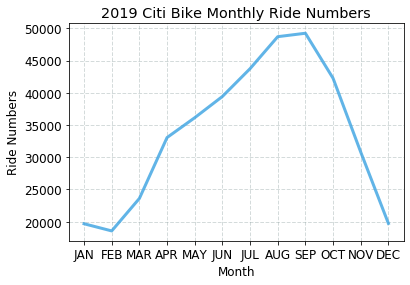

In [88]:
# extract summarized bikeID column data
group_cb_month = cb_month['bikeid']


# Monthly summary of the riding data in 2-16 and line chart
plt.figure('Monthly riding data line chart')
plt.rc('font', family = 'sans-serif', size = 12)

a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         group_cb_month,'g-',
         color = '#39A2E1', 
         linewidth = 3, 
         markeredgewidth = 3,
         markeredgecolor = '#39A2E1',
         alpha = 0.8) 

plt.xlabel('Month')
plt.ylabel('Ride Numbers')
plt.title('2019 Citi Bike Monthly Ride Numbers')
plt.grid(color = '#95a5a6',
         linestyle = '--',
         linewidth = 1,
         axis = 'both',
         alpha = 0.4)

plt.xticks(a, ('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'))
plt.show()

## Quarterly summary of riding data in 2019 and bar chart

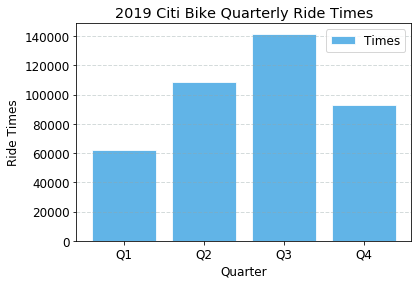

In [98]:
# count quarterly riding numbers
cb_quarterly = cb.resample('Q',kind='period').agg(len)

# extract summarized bikeID column data
group_cb_quarterly = cb_quarterly['bikeid']

# Monthly quarterly of the riding data in 2016 and line chart
plt.figure('Quarterly riding data bar chart')
plt.rc('font', family = 'sans-serif', size = 12)
a = np.array([1,2,3,4])
plt.bar([1,2,3,4],
        group_cb_quarterly,
        color = '#39A2E1',
        alpha = 0.8,
        align = 'center',
        edgecolor = 'white')
plt.xlabel('Quarter')
plt.ylabel('Ride Times')
plt.title('2019 Citi Bike Quarterly Ride Times')
plt.legend(['Times'], loc = 'best')
plt.grid(color = '#95a5a6',
         linestyle = '--', 
         linewidth = 1,
         axis = 'y',
         alpha = 0.4)
plt.xticks(a,('Q1','Q2','Q3','Q4'))
plt.show()

## Calculate riders' gender ratio and make pie chart

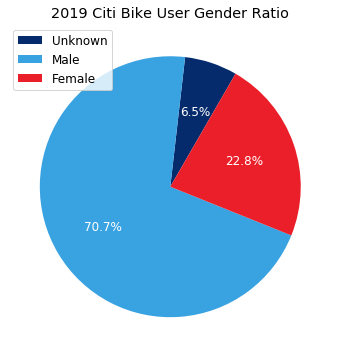

In [110]:
# Summarize riders gender, and calculate ratio
user_gender = cb.groupby('gender')['bikeid'].agg(len)/cb["bikeid"].count()*100

# Summarize riders gender and make pie chart
plt.figure('Rider gender pie chart',figsize=(15,6))
plt.rc('font', family = 'sans-serif', size = 12)
colors = ["#052B6C","#39A2E1","#EA1F29"]
name = ['Unknown', 'Male', 'Female']
plt.pie(user_gender,
        labels = name,
        colors = colors,
        textprops=dict(color="w"),
        explode = (0, 0, 0),
        startangle = 60,
        autopct = '%1.1f%%'
       )
plt.title('2019 Citi Bike User Gender Ratio')
plt.legend(name, 
           loc = 'best')
plt.show()

## Riders' age group and bar chart

In [112]:
# check Date of birth range
cb['birth year'].min(), cb['birth year'].max()

(1887, 2003)

In [114]:
# calculate age based on DOB and 2016
cb['age'] = 2019 - cb['birth year']

# Min and Max of age
cb['age'].min(), cb['age'].max()


(16, 132)

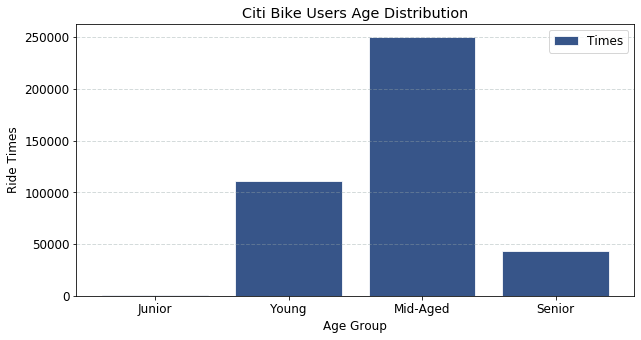

In [118]:
# group riders by age
bins = [0, 18, 30, 50, 131]
group_age = ['Junior (0-18)', 'Young (18-30)', 'Mid-Aged (30-50)', 'Senior (>50)']
cb['group_age'] = pd.cut(cb['age'], bins, labels = group_age)

# summarize age data
user_age = cb.groupby('group_age')['group_age'].agg(len)

# make aga bar chart
plt.figure('Riders age distribution bar chart',figsize=(10,5))
plt.rc('font', 
       family = 'sans-serif', 
       size = 12)
a = np.array([1,2,3,4])
plt.bar([1,2,3,4],
        user_age,
        color = '#052B6C',
        alpha = 0.8,
        align = 'center',
        edgecolor = 'white')
plt.xlabel('Age Group')
plt.ylabel('Ride Times')
plt.title('Citi Bike Users Age Distribution')
plt.legend(['Times'], 
           loc = 'upper right')
plt.grid(color = '#95a5a6',
         linestyle = '--', 
         linewidth = 1,
         axis = 'y',
         alpha = 0.4)
plt.xticks(a,('Junior', 'Young', 'Mid-Aged', 'Senior'))
plt.show()

## User Membership Type and Pie Chart

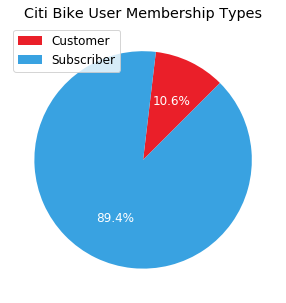

In [131]:
# User Membership Type and Pie Chart
user_type = cb.groupby('usertype')['bikeid'].agg(len)/cb["bikeid"].count()*100

# User Membership Type Pie Chart
plt.figure('User Membership Type Pie Chart',figsize=(10,5))
plt.rc('font', family = 'sans-serif', size = 12)
colors = ["#EA1F29","#39A2E1"]
name = ['Customer', 'Subscriber']
plt.pie(user_type,
        labels = name,
        colors = colors,
        textprops=dict(color="w"),
        explode = (0,0),
        startangle = 45,
        autopct = '%1.1f%%')
plt.title('Citi Bike User Membership Types')
plt.legend(['Customer', 'Subscriber'], 
           loc = 'best')
plt.show()

## May 2019 Daily 24 Hrs User Trend Line

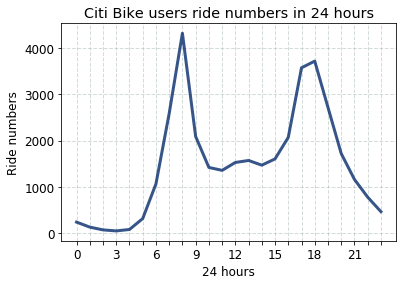

In [142]:
# Read the May 2019 Data and create DataFrame
cb5 = pd.DataFrame(pd.read_csv('2019 Data/JC-201905-citibike-tripdata.csv'))

# split starttime column
time_split = pd.DataFrame((x.split(' ') for x in cb5.starttime),
                          index = cb5.index,
                          columns = ['start_date','start_time'])

# concatenate the splitted column with original data
cb5 = pd.merge(cb5,
               time_split,
               right_index = True, 
               left_index = True)

# change star_time column to DateTime format
cb5['start_time'] = pd.to_datetime(cb5['start_time'])

# set startime as row index
cb5 = cb5.set_index('start_time')

# set data by hour
star_hour = cb5.resample('H').agg(len)

# extract bikeID data by hour
ride_hour = star_hour["bikeid"]

# create May 2019 daily 24 hour user trend line
plt.figure('May 2019 Daily 24 Hrs User Trend Line')
plt.rc('font', family = 'sans-serif', size = 12)
a = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
         ride_hour,'g-',
         color = '#052B6C',
         linewidth = 3,
         markeredgewidth = 3,
         markeredgecolor = '#052B6C',
         alpha = 0.8)
plt.xlabel('24 hours')
plt.ylabel('Ride numbers')
plt.title('Citi Bike users ride numbers in 24 hours')
plt.grid( color = '#95a5a6',
         linestyle = '--', 
         linewidth = 1 ,
         axis = 'both',
         alpha = 0.4)
plt.xticks(a, ('0','','','3','','','6','','','9','','','12','','','15','','','18','','','21','','') )
plt.show()

## May 2019 Ride Time and Bar Charts

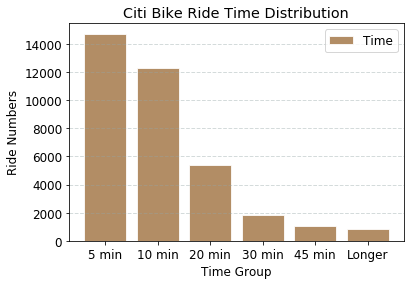

In [145]:
# Group each ride time
bins = [0, 300, 600, 1200, 1800, 2700, 2825827]

# Name each group
group_tripduration = ['5 min', '10 min', '20 min', '30 min', '45 min', 'Longer']

# add time group into original dataframe
cb5['group_tripduration'] = pd.cut(cb5['tripduration'], bins, labels = group_tripduration)

# group data by time
group_minute = cb5.groupby('group_tripduration')['group_tripduration'].agg(len)

# Ride time distribution 
plt.figure('May 2019 Ride Time Distribution')
plt.rc('font', family = 'sans-serif', size = 12)
a = np.array([1,2,3,4,5,6])
plt.bar([1,2,3,4,5,6],
        group_minute,
        color = '#9F713F',
        alpha = 0.8,
        align = 'center',
        edgecolor = 'white')
plt.xlabel('Time Group')
plt.ylabel('Ride Numbers')
plt.title('Citi Bike Ride Time Distribution')
plt.legend(['Time'], 
           loc = 'best')
plt.grid(color = '#95a5a6',
         linestyle = '--', 
         linewidth = 1,
         axis = 'y',
         alpha = 0.4)
plt.xticks(a,('5 min', '10 min', '20 min', '30 min', '45 min', 'Longer')) 
plt.show()

## May 2019 Ride Speed

In [151]:
from math import radians, cos, sin, asin, sqrt
import numpy as np
import pandas as pd

# Function to calculate distance by Longitude and Latitude
def haversine(lon1, lat1, lon2, lat2): # longitude1，Latitude1，longitude2，Latitude2
    # (decimal system)
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # change decimal system to arc
    lon1 =  map(radians, np.array(lon1))
    lat1 =  map(radians, np.array(lat1))
    lon2 =  map(radians, np.array(lon2))
    lat2 =  map(radians, np.array(lat2))
    lon1 = np.array(list(lon1)).reshape(-1,1)
    lon2 = np.array(list(lon2)).reshape(-1,1)
    lat1 = np.array(list(lat1)).reshape(-1,1)
    lat2 = np.array(list(lat2)).reshape(-1,1)
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Earth's averaged radius (km)
    return c * r * 1000

# caculate distance (m) for each ride, and add to the DataFrame
cb5['meter'] = haversine(cb5["start station longitude"],
                         cb5["start station latitude"],
                         cb5["end station longitude"],
                         cb5["end station latitude"])

# change original DF's ride time from second to hour
cb5['duration_hour'] = cb5["tripduration"]/3600

# change meter to km and calculate ride speed
cb5["speed"] = cb5["meter"]/1000/cb5["duration_hour"]

# now we have the speed for each ride, need to calculate user's average riding speed

# sum up all ride distance and change to km
km = cb5["meter"].sum()/1000

# sum up all ride time (in second) and change to hour
hour = cb5["tripduration"].sum()/3600

# calculate average speed
speed = km/hour

print('Average ride speed is ')
print(round(speed,2))
print('km/hr.') 
#4.3493141813679695

Average ride speed is 
4.35
km/hr.


## Any Correlations between Rider Speed and User Age?

In [199]:
# Calculate and add age column
cb5['age'] = 2019 - cb5['birth year']

# extract age and ride speed
age_speed = cb5[['speed','age']] #需要是2D的array，所以有两层[]

# drop any missing value
age_speed = age_speed.dropna()

# set age as independent variable X
X = np.array(age_speed[['age']]) #需要是2D的array，所以有两层[]

# set speed as dependent variable Y
Y = np.array(age_speed[['speed']]) #需要是2D的array，所以有两层[]

# import linear regression
from sklearn import linear_model

# import data into linear model
clf_age = linear_model.LinearRegression()
clf_age.fit (X,Y)

# Slope/gradient
print(f"Age Model's Slope: clf_age.coef_: {clf_age.coef_}")

# Intercept
print(f"Age Model's Intercept: clf_age.intercept_: {clf_age.intercept_}")

#R square
print(f"Age Model's R Square: clf_age.score(X,Y): {clf_age.score(X,Y)}")

# 20-year-old ride speed prediction
print(f"Age Model Predicted speed for riders of age 20, clf_age.predict([[20]]): {clf_age.predict([[20]])} km/hr")

# 50-year-old ride speed prediction
print(f"Age Model Predicted speed for riders of age 50, clf_age.predict([[50]]): {clf_age.predict([[50]])} km/hr")

Age Model's Slope: clf_age.coef_: [[-0.02664686]]
Age Model's Intercept: clf_age.intercept_: [9.98319028]
Age Model's R Square: clf_age.score(X,Y): 0.0047057729928360326
Age Model Predicted speed for riders of age 20, clf_age.predict([[20]]): [[9.45025312]] km/hr
Age Model Predicted speed for riders of age 50, clf_age.predict([[50]]): [[8.65084737]] km/hr


## Which routes are most popular?

In [212]:
# Top 10 most popular rental stations 

# Use Pivot-table to find the coordinates of the top 10 most popular rental stations 
start_station = pd.pivot_table(cb5, 
                               index = ['start station name',
                                        'start station latitude',
                                        'start station longitude'], 
                               values = ['bikeid'], 
                               aggfunc = [len], 
                               fill_value = 0, 
                               margins = True).head(10)
print('Coordinates of top 10 most popular starting points')
display(start_station)

Coordinates of top 10 most popular starting points


,,,len
,,,bikeid
start station name,start station latitude,start station longitude,
5 Corners Library,40.734961,-74.059503,229
Astor Place,40.719282,-74.071262,348
Baldwin at Montgomery,40.723659,-74.064194,389
Bergen Ave,40.722104,-74.071455,295
Brunswick & 6th,40.726012,-74.050389,764
Brunswick St,40.724176,-74.050656,755
Christ Hospital,40.734786,-74.050444,253
City Hall,40.717733,-74.043845,935


In [216]:
# Popular ride routes tracking

# location/coordinates of starting and ending poins for each rides
end_station = pd.pivot_table(cb5, 
                             index = ['start station name', 
                                      'start station latitude', 
                                      'start station longitude', 
                                      'end station latitude', 
                                      'end station longitude',
                                      'end station name'], 
                             values = ['bikeid'], 
                             aggfunc = [len], 
                             fill_value = 0, 
                             margins = True).head(10)
print('Coordinates of starting and ending points of top 10 most popular riding routes')
display(end_station)

Coordinates of starting and ending points of top 10 most popular riding routes


len
                                                                                                                               bikeid
start station name start station latitude start station longitude end station latitude end station longitude end station name        
5 Corners Library  40.734961              -74.059503              40.714145            -74.033552            Paulus Hook            2
                                                                  40.715178            -74.037683            Grand St               1
                                                                  40.716247            -74.033459            Exchange Place        11
                                                                  40.716490            -74.041050            York St                3
                                                                  40.716540            -74.049638            JC Medical Center      3
                                                                  40.717733            -74.043845            City Hall              3
                                                                  40.718211            -74.083639            Union St               1
                                                                  40.718355            -74.038914            Columbus Drive         1
                                                                  40.718489            -74.047727            Van Vorst Park         1
                                                                  40.719252            -74.034234            Harborside             3

## Rides and Temperature, Scatter Plots and Regression Analysis

H:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


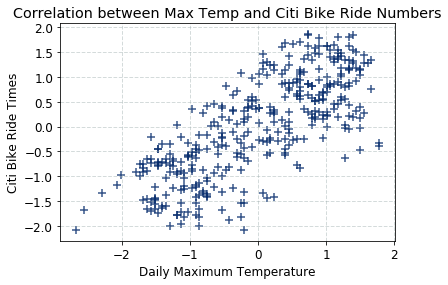

In [247]:
# read 2019 NYC Weather Data from NOAA
weather_raw = pd.DataFrame(pd.read_csv('2019 Data/weather_data_nyc_NOAA_2019_raw.csv'))

# choose Central Park location
weather = weather_raw[weather_raw['NAME'].str.contains("CENTRAL PARK")]
weather.set_index('DATE', inplace=True)

# Extract daily maximum temperature
group_weather_day = weather[['TMAX']] #需要是2D的array，所以有两层[]

''' #在前面有提高这几行命令
#更改startime字段为日期格式
cb['starttime'] = pd.to_datetime(cb['starttime'])

#设置startime为表索引
cb = cb.set_index('starttime')

'''
# Regroup 2019 ride data by days
cb_day = cb.resample('D').agg(len)

# extract daily ride number
group_cb_day = cb_day[['bikeid']] #需要是2D的array，所以有两层[]

# Standard processing for daily max temp and ride number
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(group_weather_day)
X_Standard = scaler.transform(group_weather_day)

scaler = preprocessing.StandardScaler().fit(group_cb_day)
Y_Standard = scaler.transform(group_cb_day)

# scatter plots for 2019 ride number vs. max temp 
plt.figure('scatter plots for 2019 ride number vs. max temp ')
plt.rc('font', 
       family = 'sans-serif', 
       size = 12)

plt.scatter(X_Standard,
            Y_Standard,
            60,
            color = '#052B6C',
            marker = '+',
            alpha = 0.8,
            linewidth = 1.5)
plt.xlabel('Daily Maximum Temperature')
plt.ylabel('Citi Bike Ride Times')
plt.title('Correlation between Max Temp and Citi Bike Ride Numbers')
plt.grid(color = '#95a5a6',
         linestyle = '--', 
         linewidth = 1,
         axis = 'both',
         alpha = 0.4)
plt.show()

In [263]:
# Set daily max temp as independent variable X:
X = np.array(weather[['TMAX']])
# Set daily ride number as dependenet variable Y:
Y = np.array(cb_day[['bikeid']])

# Import linear regression model
from sklearn import linear_model
clf_temp = linear_model.LinearRegression()
clf_temp.fit (X,Y)

# Calculate correlations 
print(f"Temp Model's R Square: clf_temp.score(X,Y): {clf_temp.score(X,Y)}")
# Slope/gradient
print(f"Temp Model's Slope: clf_temp.coef_: {clf_temp.coef_}")
# Intercept
print(f"Temp Model's Intercept: clf_temp.intercept_: {clf_temp.intercept_}\n")

# Regression models
# Predict CitiBike total rental number under various max temperatures, 19,39 and 97 deg F
print(f"When maximum temperature is 19 degree F, daily number of rides is predicted to be: {clf_temp.predict([[19]])}")
print(f"When maximum temperature is 39 degree F, daily number of rides is predicted to be: {clf_temp.predict([[39]])}")
print(f"When maximum temperature is 97 degree F, daily number of rides is predicted to be: {clf_temp.predict([[97]])}")


Temp Model's R Square: clf_temp.score(X,Y): 0.5646595147393267
Temp Model's Slope: clf_temp.coef_: [[18.05107333]]
Temp Model's Intercept: clf_temp.intercept_: [-21.59190953]

When maximum temperature is 19 degree F, daily number of rides is predicted to be: [[321.37848367]]
When maximum temperature is 39 degree F, daily number of rides is predicted to be: [[682.3999502]]
When maximum temperature is 97 degree F, daily number of rides is predicted to be: [[1729.36220315]]


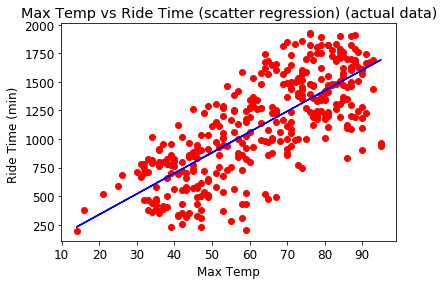

In [260]:
# Visualising the Regression results
plt.figure('Regression and scatter plots for 2019 daily max temp vs. ride number (actual data)')
plt.scatter(X, Y, color = 'red')
plt.plot(X, clf_temp.predict(X), color = 'blue')
plt.title('Max Temp vs Ride Time (scatter regression) (actual data)')
plt.xlabel('Max Temp')
plt.ylabel('Ride Time (min) ')
plt.show()

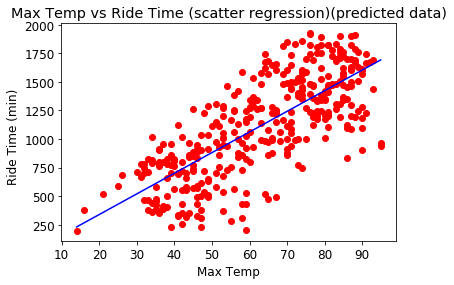

In [261]:
# Visualising the Regression results (for higher resolution and smoother curve)
plt.figure('Regression and scatter plots for 2019 daily max temp vs. ride number (predicted data)')
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, clf_temp.predict(X_grid), color = 'blue')
plt.title('Max Temp vs Ride Time (scatter regression)(predicted data)')
plt.xlabel('Max Temp')
plt.ylabel('Ride Time (min)  ')
plt.show()

In [ ]:
# Make Spyder Matplotlib plots appear in own window
# https://www.scivision.co/spyder-with-ipython-make-matplotlib-plots-appear-in-own-window/

In [ ]:
script_run_end_time = time.time()

print("------- This entire program took % seconds to finish -------" % (script_run_end_time - script_run_start_time))